## Read each CSV file

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

## Replace the zip_path with location of User Identification From Walking Activity.zip

In [2]:
import pandas as pd
import zipfile
zip_path = "F:\\User Identification From Walking Activity.zip"

# name the columns
columns = ["time_step", "x_acc", "y_acc", "z_acc"]
zf = zipfile.ZipFile(zip_path) 
print(zf)
user = {}

# Read each csv file in user dictionary
for i in range(0,22,1):
    user[i] = pd.read_csv(zf.open("User Identification From Walking Activity/{}.csv".format(str(i+1))), header=None, names=columns)

<zipfile.ZipFile filename='F:\\User Identification From Walking Activity.zip' mode='r'>


In [3]:
## User 1 and User 22
user[0], user[21]

(       time_step    x_acc    y_acc    z_acc
 0       0.000000  0.69464  3.17350   7.5048
 1       0.030639  0.14982  3.48680   9.2755
 2       0.069763 -0.29965  1.94770   9.1120
 3       0.099823 -1.68890  1.41650  10.1200
 4       0.129820 -2.17930  0.95342  10.9240
 ...          ...      ...      ...      ...
 5064  154.070000 -0.69464  5.05310   8.0769
 5065  154.100000 -0.14982  5.17570   9.0030
 5066  154.140000 -0.53119  5.32560   8.1177
 5067  154.170000 -0.80360  5.28470   7.8589
 5068  154.200000 -0.46309  4.79440   8.6625
 
 [5069 rows x 4 columns],
        time_step    x_acc   y_acc   z_acc
 0       0.000000 -1.30760  5.8976  7.9270
 1       0.029999 -1.33480  5.8295  8.4991
 2       0.060516 -1.64810  5.9793  7.8181
 3       0.090454 -1.75700  5.7886  7.0553
 4       0.120120 -2.11120  5.8976  7.0145
 ...          ...      ...     ...     ...
 9693  305.170000 -1.14410  6.0883  7.4640
 9694  305.220000 -0.57205  5.4345  8.8124
 9695  305.240000 -0.76274  5.8976  8.1586
 9

## First idea was to just plot the x,y and z acceleration against time for each user and see the differences

## Each user plot was varied in nature, below is the plot of 4 users.

<Figure size 960x800 with 0 Axes>

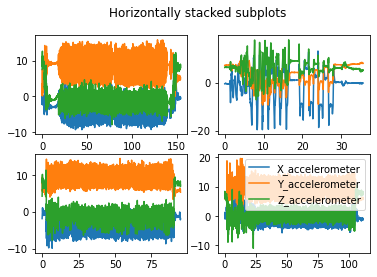

In [4]:
# importing package
import matplotlib.pyplot as plt
figure(figsize=(12, 10), dpi=80)
# create data

user_1 = user[0].copy()
user_5 = user[4].copy()
user_10 = user[9].copy()
user_15 = user[14].copy()

t1 = user_1.time_step
x1 = user_1.x_acc
y1 = user_1.y_acc
z1 = user_1.z_acc


t5 = user_5.time_step
x5 = user_5.x_acc
y5 = user_5.y_acc
z5 = user_5.z_acc

t10 = user_10.time_step
x10 = user_10.x_acc
y10 = user_10.y_acc
z10 = user_10.z_acc

t15 = user_15.time_step
x15 = user_15.x_acc
y15 = user_15.y_acc
z15 = user_15.z_acc

# plot lines

fig, axs = plt.subplots(2,2)
fig.suptitle('Horizontally stacked subplots')

axs[0,0].plot(t1, x1, label = "X_accelerometer")
axs[0,0].plot(t1, y1, label = "Y_accelerometer")
axs[0,0].plot(t1, z1, label = "Z_accelerometer")

axs[0,1].plot(t5, x5, label = "X_accelerometer")
axs[0,1].plot(t5, y5, label = "Y_accelerometer")
axs[0,1].plot(t5, z5, label = "Z_accelerometer")

axs[1,0].plot(t10, x10, label = "X_accelerometer")
axs[1,0].plot(t10, y10, label = "Y_accelerometer")
axs[1,0].plot(t10, z10, label = "Z_accelerometer")

axs[1,1].plot(t15, x15, label = "X_accelerometer")
axs[1,1].plot(t15, y15, label = "Y_accelerometer")
axs[1,1].plot(t15, z15, label = "Z_accelerometer")

plt.legend()
plt.show()


### I added rolling mean with window=5 to see if it makes any difference to the plots and prediction. The plot is doesn't change much for each user. Lag, Lead data can also be used for more features.

## Below is a plot for user no. 20 with actual values and rolling mean with window=5

<Figure size 960x800 with 0 Axes>

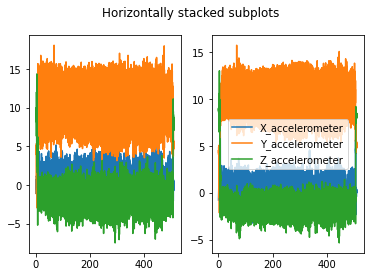

In [5]:
# importing package
import matplotlib.pyplot as plt
figure(figsize=(12, 10), dpi=80)
# create data

user_20 = user[19].copy()

user_20['x_acc_5'] = user_20.x_acc.rolling(window=5).mean()
user_20['y_acc_5'] = user_20.y_acc.rolling(window=5).mean()
user_20['z_acc_5'] = user_20.z_acc.rolling(window=5).mean()


t = user_20.time_step
x = user_20.x_acc
y = user_20.y_acc
z = user_20.z_acc

t1 = user_20.time_step
x1 = user_20.x_acc_5
y1 = user_20.y_acc_5
z1 = user_20.z_acc_5

# plot lines

fig, axs = plt.subplots(1,2)
fig.suptitle('Horizontally stacked subplots')

axs[0].plot(t, x, label = "X_accelerometer")
axs[0].plot(t, y, label = "Y_accelerometer")
axs[0].plot(t, z, label = "Z_accelerometer")

axs[1].plot(t1, x1, label = "X_accelerometer")
axs[1].plot(t1, y1, label = "Y_accelerometer")
axs[1].plot(t1, z1, label = "Z_accelerometer")

plt.legend()
plt.show()


# ------------------------------------------------------------------------------------------------------------

## Creating label column with 22 classes and splitting the data into train and test set for prediction

## Normally I split into train, eval and test set or just train and test with k=5 or k=10 folder cross validation. But I am just keeping it simple for this case

In [9]:
from sklearn.model_selection import train_test_split
# Create empty dictionary to get train and test data from every input dataset
# This way the test set will contain 20% sample for each user type. 
train = {}
test = {}
train_count = 0 
test_count = 0
for i in range(0,22,1):
    
    #Adding label column to each user data, label will be integer ranging from (1 to 22)
    user[i]['label'] = i+1
    # Split the data into training and test set , 80-20 split
    train[i], test[i] = train_test_split(user[i], train_size=0.8, random_state=42)

    train_count = train_count + train[i].shape[0]
    test_count = test_count + test[i].shape[0]

In [10]:
train_count, test_count

(119455, 29877)

### get train and test set 

In [11]:
train_set = pd.concat(train.values(), ignore_index=True)
test_set = pd.concat(test.values(), ignore_index=True)

## Separating X and y for training and test set

In [12]:
X_train, y_train = train_set.iloc[:,0:-1], train_set.label
X_test, y_test = test_set.iloc[:,0:-1], test_set.label

In [13]:
X_train.head(5)

time_step   x_acc    y_acc    z_acc
0    83.3100 -2.3018   7.6274 -0.42223
1    36.1600 -6.8919  11.3050 -1.37570
2    31.0900 -6.3607  13.4430 -2.22010
3   128.4800 -2.7241   6.3198 -0.88532
4     6.6199 -2.1112   9.4661 -2.36990

In [14]:
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Standard scalar transformation. The accuracy was slightly higher with scalar transformation when compared to without any kind of transformation

In [15]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

## Standard scalar transformation

In [16]:
X_train_transformed = scaler.fit_transform(X_train)
# X_valid_transformed = scaler.transform(X_valid)
X_test_transformed = scaler.fit_transform(X_test)

## Scalar transformed train and test set

In [17]:
X_train_transformed

array([[-0.61300138, -0.22345101, -0.41296775, -0.31034866],
       [-0.89508381, -1.82586056,  0.91318853, -0.61366785],
       [-0.9254159 , -1.64041799,  1.6841593 , -0.88228955],
       ...,
       [-0.08329665, -0.82257854,  0.18134326, -0.72631464],
       [-0.94952602, -1.01276889,  0.95249434,  0.15325918],
       [ 0.26094562, -0.55631903, -1.18898697,  0.00595307]])

In [18]:
X_test_transformed

array([[-0.90890054, -2.07072381,  0.63010955, -1.48701353],
       [-0.5839598 , -1.64460315,  0.27108063, -0.84564238],
       [-0.5050123 , -1.40314172,  0.07430099, -1.56017674],
       ...,
       [-0.11810972, -0.28573083,  0.05952807, -0.22576827],
       [ 0.20964203, -0.80654498, -1.17038077, -0.50555197],
       [-0.54167504, -0.88702053, -0.25532657, -1.19429748]])

## I am using 3 methods to classify the data
### Decision tree classifier, Random Forest and Artificial Neural network.
## I am not using a baseline model which I would normally use to compare with better models

## Decision Tree classifier

In [19]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# training a DescisionTreeClassifier with depth of 20, using default values otherwise
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 20, random_state=0).fit(X_train_transformed, y_train)
dtree_predictions = dtree_model.predict(X_test_transformed)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


## Sample 5 fold cross validation

In [20]:
from sklearn.model_selection import cross_val_score
dtree_model = DecisionTreeClassifier(max_depth = 20, random_state=0)
scores = cross_val_score(dtree_model, X_train_transformed, y_train, cv=5)
print("Accuracy for 5 fold cross validation is", scores)

Accuracy for 5 fold cross validation is [0.58607844 0.58729229 0.58775271 0.58540873 0.58976184]


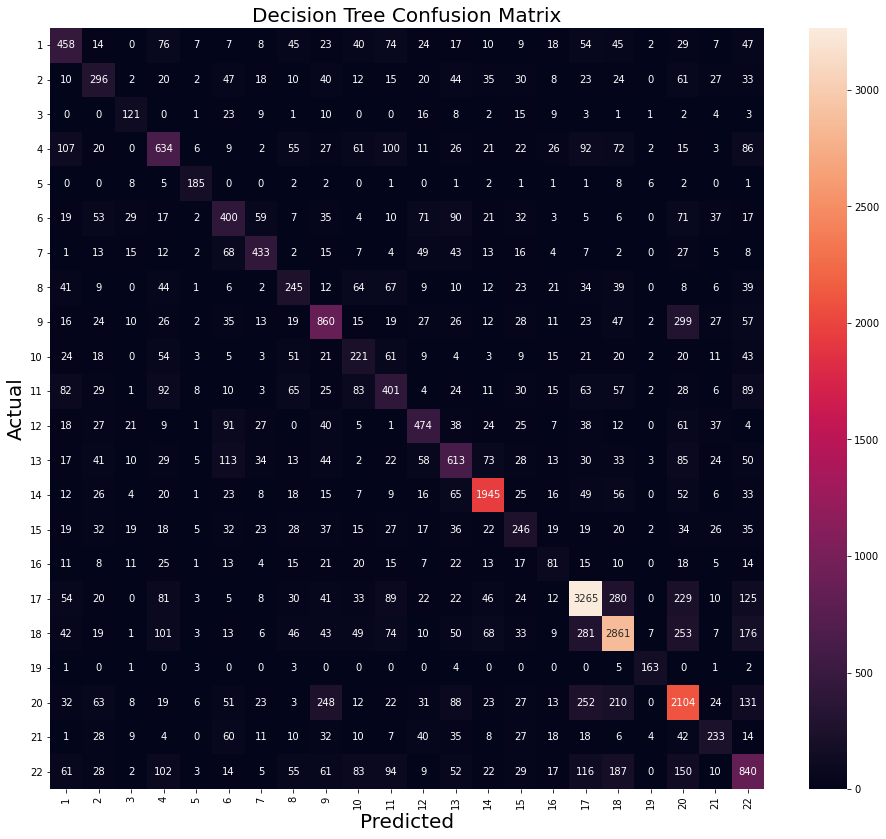

In [21]:
class_names = y_test.unique()

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Decision Tree Confusion Matrix', fontsize=20)

plt.savefig('ConMat24_dt.png')
plt.show()

## The values shown in diagonal of the confusion matrix are the ones that are accurately predicted. 

## The rows apart from the square in diagonal are False Negatives, which means they should have been predicted as the row label but were falsely predicted as the column label
## Similarly, the column values are false positives. e.g. the first column , row 17, 54 data points are predicted as 1 whereas their actual value is 17

## Recall = True positive / (True positive + False Negative )
## Precision = True positive / (True positive + False positive )

In [22]:
print(classification_report(y_test, dtree_predictions, digits=3))

              precision    recall  f1-score   support

           1      0.446     0.452     0.449      1014
           2      0.385     0.381     0.383       777
           3      0.445     0.528     0.483       229
           4      0.457     0.454     0.455      1397
           5      0.740     0.819     0.777       226
           6      0.390     0.405     0.397       988
           7      0.619     0.580     0.599       746
           8      0.339     0.354     0.346       692
           9      0.521     0.538     0.529      1598
          10      0.297     0.358     0.325       618
          11      0.361     0.355     0.358      1128
          12      0.513     0.494     0.503       960
          13      0.465     0.457     0.461      1340
          14      0.815     0.808     0.812      2406
          15      0.353     0.337     0.345       731
          16      0.241     0.234     0.238       346
          17      0.741     0.742     0.741      4399
          18      0.715    

## Random Forest Classifier is similar to Decision trees, except a default 100 trees are trained with split on random values for each tree
## I like to use Random foreset classifier for many use cases

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train_transformed, y_train)
rf_predictions = rf.predict(X_test_transformed)

# creating a confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

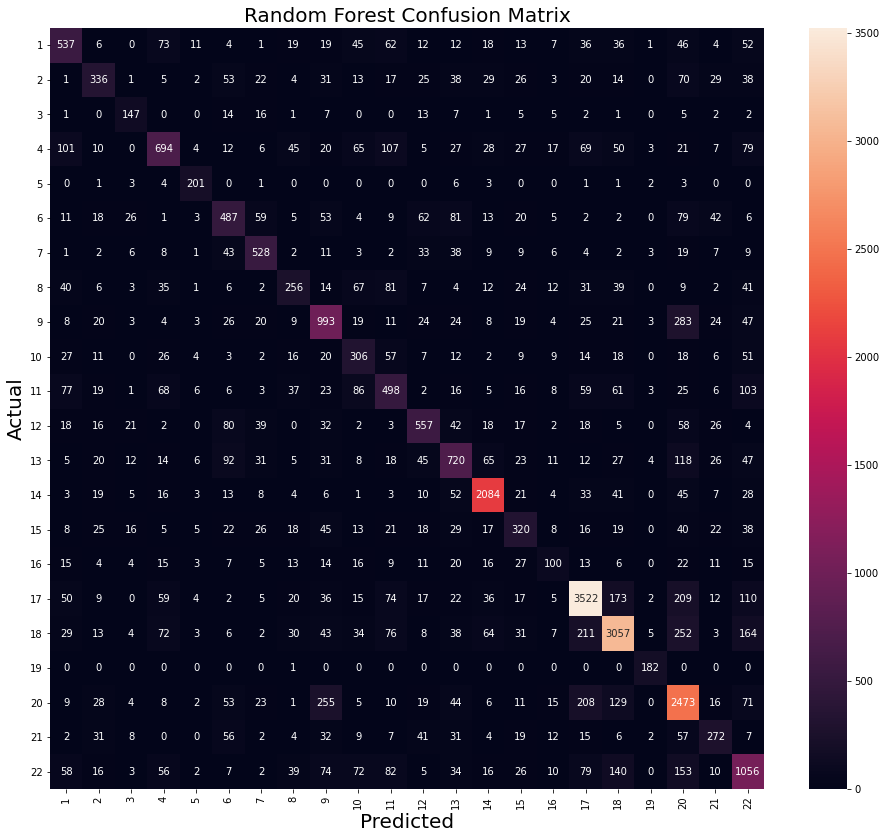

In [32]:
class_names = y_test.unique()

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Random Forest Confusion Matrix', fontsize=20)

plt.savefig('ConMat24_rf.png')
plt.show()

## Precision and Recall are much better for Random forest model

In [33]:
print(classification_report(y_test, rf_predictions, digits=3))

              precision    recall  f1-score   support

           1      0.536     0.530     0.533      1014
           2      0.551     0.432     0.484       777
           3      0.551     0.642     0.593       229
           4      0.596     0.497     0.542      1397
           5      0.761     0.889     0.820       226
           6      0.491     0.493     0.492       988
           7      0.658     0.708     0.682       746
           8      0.484     0.370     0.419       692
           9      0.565     0.621     0.592      1598
          10      0.391     0.495     0.437       618
          11      0.434     0.441     0.438      1128
          12      0.605     0.580     0.592       960
          13      0.555     0.537     0.546      1340
          14      0.849     0.866     0.858      2406
          15      0.471     0.438     0.454       731
          16      0.400     0.289     0.336       346
          17      0.802     0.801     0.801      4399
          18      0.794    

## The precision and recall values are much higher compared to Decision tree model

## In both cases, we can find pairs of users which have been wrongly predicted. This can mean that they are similar to each other than to others in some ways

## e.g. of such pairs ( user 9 and user 20 ), 283 data points for user 9 have been misclassified as user 20 and 255 data points for user 20 have been misclassified as user 9
## Similary ( user 17, 18, 20 and 22 ) have a lot of misclassified values between them.

## Keep in mind that no feature engineering was done for the dataset in these models

## I also used a neural network to see if it performs any better. 

In [34]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [35]:
X_train_transformed.shape, len(np.array(y_train))

((119455, 4), 119455)

In [36]:
ann = models.Sequential([
    layers.Flatten(input_shape=X_train_transformed[1].shape),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(23, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train_transformed, np.array(y_train), validation_data=(X_test_transformed, np.array(y_test)),
                    batch_size=20, epochs=2)

Epoch 1/2
5973/5973 [==============================] - 7s 1ms/step - loss: 1.7154 - accuracy: 0.4271 - val_loss: 1.5799 - val_accuracy: 0.4676
Epoch 2/2
5973/5973 [==============================] - 6s 1ms/step - loss: 1.5310 - accuracy: 0.4791 - val_loss: 1.5312 - val_accuracy: 0.4767


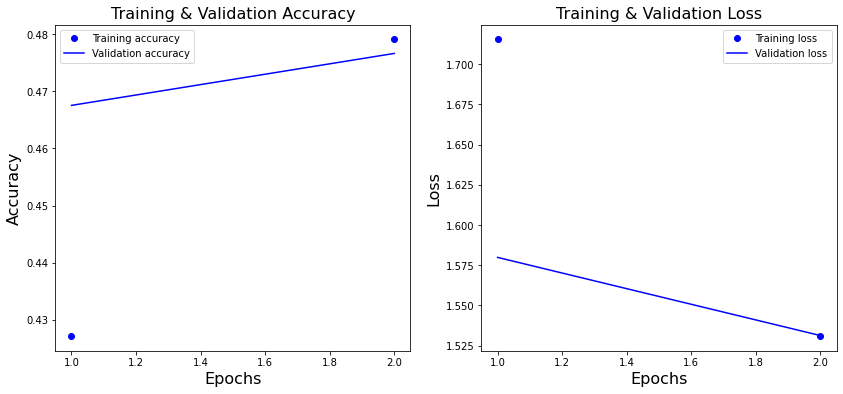

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## The training and validation accuracy and loss function plots are closer to each other. There is slight hint of over fitting but it is not much to be of issue.

In [38]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_5 (Dense)              (None, 23)                1173      
Total params: 3,973
Trainable params: 3,973
Non-trainable params: 0
_________________________________________________________________


# Ways to improve the models
### 1) Gather more data for each users
### 2) Get more features
### 3) Feature engineering
### 3) Hyperparameter tuning using Grid Search
### 4) Random sampling of train and test data
### 5) k-fold cross validation for generalization of models
### 6) Separate modelling for users that are identical to each other
### 7) Create a pipeline using sklearn pipeline function

# -------------------------------------------------------------------------------------------------------------

# Running the same models with created features

## Creating features
### 1) Rolling mean with window=5
### 2) Mean acceleration per column 
### 3) Avg time between observation

In [61]:
import pandas as pd
import zipfile
zip_path = "F:\\User Identification From Walking Activity.zip"

# name the columns
columns = ["time_step", "x_acc", "y_acc", "z_acc"]
zf = zipfile.ZipFile(zip_path) 
print(zf)
user = {}

# Read each csv file in user dictionary
for i in range(0,22,1):
    user[i] = pd.read_csv(zf.open("User Identification From Walking Activity/{}.csv".format(str(i+1))), header=None, names=columns)

<zipfile.ZipFile filename='F:\\User Identification From Walking Activity.zip' mode='r'>


## Rolling mean window=5

In [62]:
for i in range(22):
    user[i]['x_acc_5'] = user[i].x_acc.rolling(window=5).mean()
    user[i]['y_acc_5'] = user[i].y_acc.rolling(window=5).mean()
    user[i]['z_acc_5'] = user[i].z_acc.rolling(window=5).mean()

### Mean acceleration for x,y and z

In [63]:
for i in range(22):
    user[i]['x_acc_mean'] = user[i].x_acc.mean()
    user[i]['y_acc_mean'] = user[i].y_acc.mean()
    user[i]['z_acc_mean'] = user[i].z_acc.mean()

### Avg time between observation

In [64]:
for i in range(22):
    user[i]['time_diff'] = user[i]['time_step'].diff().mean()

### Avg diff between (x,y) , (y,z) and (x,z)

In [65]:
for i in range(22):
    user[i]['xy_diff_mean'] = (user[i]['x_acc'] - user[i]['y_acc']).mean()
    user[i]['yz_diff_mean'] = (user[i]['y_acc'] - user[i]['z_acc']).mean()
    user[i]['zx_diff_mean'] = (user[i]['z_acc'] - user[i]['x_acc']).mean()

In [66]:
#user 1
user[0]

time_step    x_acc    y_acc    z_acc   x_acc_5   y_acc_5  z_acc_5  \
0       0.000000  0.69464  3.17350   7.5048       NaN       NaN      NaN   
1       0.030639  0.14982  3.48680   9.2755       NaN       NaN      NaN   
2       0.069763 -0.29965  1.94770   9.1120       NaN       NaN      NaN   
3       0.099823 -1.68890  1.41650  10.1200       NaN       NaN      NaN   
4       0.129820 -2.17930  0.95342  10.9240 -0.664678  2.195584  9.38726   
...          ...      ...      ...      ...       ...       ...      ...   
5064  154.070000 -0.69464  5.05310   8.0769 -0.514848  5.023160  8.11228   
5065  154.100000 -0.14982  5.17570   9.0030 -0.444022  5.047680  8.25664   
5066  154.140000 -0.53119  5.32560   8.1177 -0.473986  5.132140  8.21032   
5067  154.170000 -0.80360  5.28470   7.8589 -0.550260  5.186620  8.19670   
5068  154.200000 -0.46309  4.79440   8.6625 -0.528468  5.126700  8.34380   

      x_acc_mean  y_acc_mean  z_acc_mean  time_diff  xy_diff_mean  \
0      -3.554254    8.557989   -0.844095   0.030426    -12.112244   
1      -3.554254    8.557989   -0.844095   0.030426    -12.112244   
2      -3.554254    8.557989   -0.844095   0.030426    -12.112244   
3      -3.554254    8.557989   -0.844095   0.030426    -12.112244   
4      -3.554254    8.557989   -0.844095   0.030426    -12.112244   
...          ...         ...         ...        ...           ...   
5064   -3.554254    8.557989   -0.844095   0.030426    -12.112244   
5065   -3.554254    8.557989   -0.844095   0.030426    -12.112244   
5066   -3.554254    8.557989   -0.844095   0.030426    -12.112244   
5067   -3.554254    8.557989   -0.844095   0.030426    -12.112244   
5068   -3.554254    8.557989   -0.844095   0.030426    -12.112244   

      yz_diff_mean  zx_diff_mean  
0         9.402085      2.710159  
1         9.402085      2.710159  
2         9.402085      2.710159  
3         9.402085      2.710159  
4         9.402085      2.710159  
...            ...           ...  
5064      9.402085      2.710159  
5065      9.402085      2.710159  
5066      9.402085      2.710159  
5067      9.402085      2.710159  
5068      9.402085      2.710159  

[5069 rows x 14 columns]

# Other ideas to transform data: 
## Exponential, mean without repeat

In [67]:
from sklearn.model_selection import train_test_split
# Create empty dictionary to get train and test data from every input dataset
# This way the test set will contain 20% sample for each user type. 
train = {}
test = {}
train_count = 0 
test_count = 0
for i in range(0,22,1):
    
    #Adding label column to each user data, label will be integer ranging from (1 to 22)
    user[i]['label'] = i+1
    # Split the data into training and test set , 80-20 split
    train[i], test[i] = train_test_split(user[i], train_size=0.8, random_state=42)

    train_count = train_count + train[i].shape[0]
    test_count = test_count + test[i].shape[0]

In [68]:
train_count, test_count

(119455, 29877)

In [77]:
train_set = pd.concat(train.values(), ignore_index=True)
test_set = pd.concat(test.values(), ignore_index=True)

## Replace null with mean

In [84]:
train_set.isnull().sum()

time_step       0
x_acc           0
y_acc           0
z_acc           0
x_acc_5         0
y_acc_5         0
z_acc_5         0
x_acc_mean      0
y_acc_mean      0
z_acc_mean      0
time_diff       0
xy_diff_mean    0
yz_diff_mean    0
zx_diff_mean    0
label           0
dtype: int64

In [85]:
test_set.isnull().sum()

time_step       0
x_acc           0
y_acc           0
z_acc           0
x_acc_5         0
y_acc_5         0
z_acc_5         0
x_acc_mean      0
y_acc_mean      0
z_acc_mean      0
time_diff       0
xy_diff_mean    0
yz_diff_mean    0
zx_diff_mean    0
label           0
dtype: int64

In [80]:
train_set['x_acc_5'].fillna(value=train_set['x_acc_5'].mean(), inplace=True)
train_set['y_acc_5'].fillna(value=train_set['y_acc_5'].mean(), inplace=True)
train_set['z_acc_5'].fillna(value=train_set['z_acc_5'].mean(), inplace=True)

test_set['x_acc_5'].fillna(value=test_set['x_acc_5'].mean(), inplace=True)
test_set['y_acc_5'].fillna(value=test_set['y_acc_5'].mean(), inplace=True)
test_set['z_acc_5'].fillna(value=test_set['z_acc_5'].mean(), inplace=True)

## Separating X and y for training and test set

In [81]:
X_train, y_train = train_set.iloc[:,0:-1], train_set.label
X_test, y_test = test_set.iloc[:,0:-1], test_set.label

In [82]:
X_train.head(5)

time_step   x_acc    y_acc    z_acc  x_acc_5   y_acc_5   z_acc_5  \
0    83.3100 -2.3018   7.6274 -0.42223 -2.49796   4.61458 -0.710982   
1    36.1600 -6.8919  11.3050 -1.37570 -5.80772   9.12024 -1.277596   
2    31.0900 -6.3607  13.4430 -2.22010 -6.43698  11.20942 -0.950702   
3   128.4800 -2.7241   6.3198 -0.88532 -3.09728   4.53558 -0.841742   
4     6.6199 -2.1112   9.4661 -2.36990 -2.12480   9.40620 -1.639900   

   x_acc_mean  y_acc_mean  z_acc_mean  time_diff  xy_diff_mean  yz_diff_mean  \
0   -3.554254    8.557989   -0.844095   0.030426    -12.112244      9.402085   
1   -3.554254    8.557989   -0.844095   0.030426    -12.112244      9.402085   
2   -3.554254    8.557989   -0.844095   0.030426    -12.112244      9.402085   
3   -3.554254    8.557989   -0.844095   0.030426    -12.112244      9.402085   
4   -3.554254    8.557989   -0.844095   0.030426    -12.112244      9.402085   

   zx_diff_mean  
0      2.710159  
1      2.710159  
2      2.710159  
3      2.710159  
4      2.710159

In [83]:
y_train.head(5)

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

## Standard scalar transformation. The accuracy was slightly higher with scalar transformation when compared to without any kind of transformation

In [73]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

## Standard scalar transformation

In [88]:
X_train_transformed = scaler.fit_transform(X_train)
# X_valid_transformed = scaler.transform(X_valid)
X_test_transformed = scaler.fit_transform(X_test)

## Scalar transformed train and test set

In [89]:
X_train_transformed

array([[-0.61300138, -0.22345101, -0.41296775, ..., -1.2743018 ,
         0.68871733,  0.25380515],
       [-0.89508381, -1.82586056,  0.91318853, ..., -1.2743018 ,
         0.68871733,  0.25380515],
       [-0.9254159 , -1.64041799,  1.6841593 , ..., -1.2743018 ,
         0.68871733,  0.25380515],
       ...,
       [-0.08329665, -0.82257854,  0.18134326, ..., -0.89709089,
         0.62532708,  0.05548134],
       [-0.94952602, -1.01276889,  0.95249434, ..., -0.89709089,
         0.62532708,  0.05548134],
       [ 0.26094562, -0.55631903, -1.18898697, ..., -0.89709089,
         0.62532708,  0.05548134]])

In [90]:
X_test_transformed

array([[-0.90890054, -2.07072381,  0.63010955, ..., -1.27420347,
         0.68865349,  0.25359449],
       [-0.5839598 , -1.64460315,  0.27108063, ..., -1.27420347,
         0.68865349,  0.25359449],
       [-0.5050123 , -1.40314172,  0.07430099, ..., -1.27420347,
         0.68865349,  0.25359449],
       ...,
       [-0.11810972, -0.28573083,  0.05952807, ..., -0.89702898,
         0.625288  ,  0.05530763],
       [ 0.20964203, -0.80654498, -1.17038077, ..., -0.89702898,
         0.625288  ,  0.05530763],
       [-0.54167504, -0.88702053, -0.25532657, ..., -0.89702898,
         0.625288  ,  0.05530763]])

## Decision Tree classifier

In [91]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# training a DescisionTreeClassifier with depth of 20, using default values otherwise
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 20, random_state=0).fit(X_train_transformed, y_train)
dtree_predictions = dtree_model.predict(X_test_transformed)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


## Sample 5 fold cross validation

In [92]:
from sklearn.model_selection import cross_val_score
dtree_model = DecisionTreeClassifier(max_depth = 20, random_state=0)
scores = cross_val_score(dtree_model, X_train_transformed, y_train, cv=5)
print("Accuracy for 5 fold cross validation is", scores)

Accuracy for 5 fold cross validation is [1. 1. 1. 1. 1.]


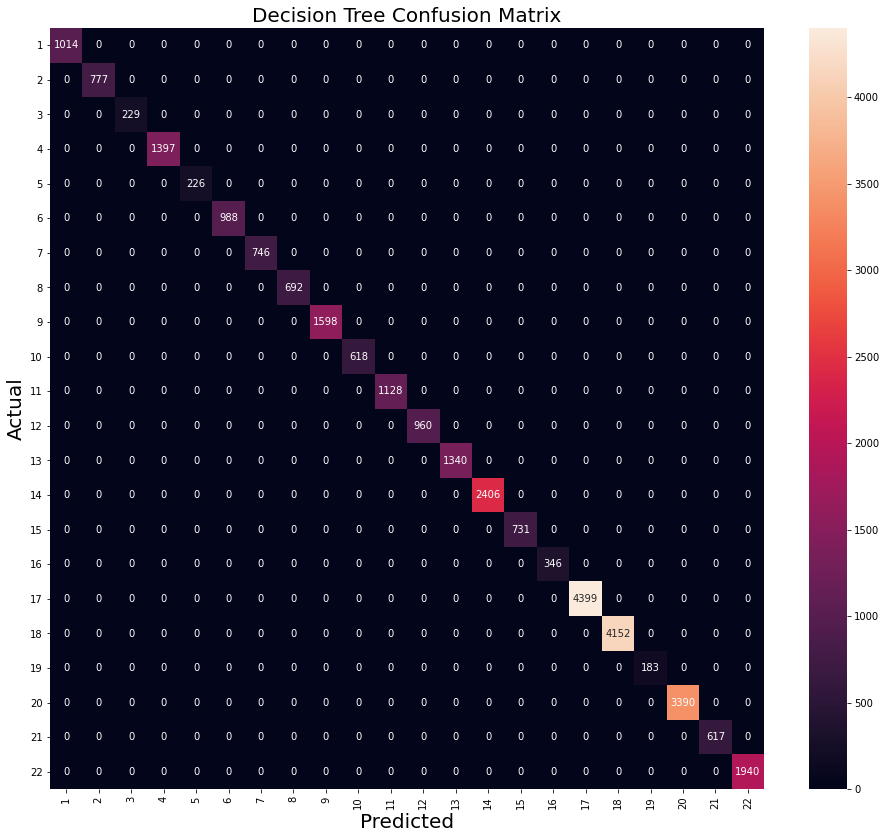

In [93]:
class_names = y_test.unique()

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Decision Tree Confusion Matrix', fontsize=20)

plt.savefig('ConMat24_dt.png')
plt.show()

## The values shown in diagonal of the confusion matrix are the ones that are accurately predicted. 

## The rows apart from the square in diagonal are False Negatives, which means they should have been predicted as the row label but were falsely predicted as the column label
## Similarly, the column values are false positives. e.g. the first column , row 17, 54 data points are predicted as 1 whereas their actual value is 17

## Recall = True positive / (True positive + False Negative )
## Precision = True positive / (True positive + False positive )

In [94]:
print(classification_report(y_test, dtree_predictions, digits=3))

              precision    recall  f1-score   support

           1      1.000     1.000     1.000      1014
           2      1.000     1.000     1.000       777
           3      1.000     1.000     1.000       229
           4      1.000     1.000     1.000      1397
           5      1.000     1.000     1.000       226
           6      1.000     1.000     1.000       988
           7      1.000     1.000     1.000       746
           8      1.000     1.000     1.000       692
           9      1.000     1.000     1.000      1598
          10      1.000     1.000     1.000       618
          11      1.000     1.000     1.000      1128
          12      1.000     1.000     1.000       960
          13      1.000     1.000     1.000      1340
          14      1.000     1.000     1.000      2406
          15      1.000     1.000     1.000       731
          16      1.000     1.000     1.000       346
          17      1.000     1.000     1.000      4399
          18      1.000    

## Random Forest Classifier is similar to Decision trees, except a default 100 trees are trained with split on random values for each tree
## I like to use Random foreset classifier for many use cases

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train_transformed, y_train)
rf_predictions = rf.predict(X_test_transformed)

# creating a confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

In [ ]:
class_names = y_test.unique()

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Random Forest Confusion Matrix', fontsize=20)

plt.savefig('ConMat24_rf.png')
plt.show()

## Precision and Recall are much better for Random forest model

In [ ]:
print(classification_report(y_test, rf_predictions, digits=3))

## The precision and recall values are much higher compared to Decision tree model

## In both cases, we can find pairs of users which have been wrongly predicted. This can mean that they are similar to each other than to others in some ways

## e.g. of such pairs ( user 9 and user 20 ), 283 data points for user 9 have been misclassified as user 20 and 255 data points for user 20 have been misclassified as user 9
## Similary ( user 17, 18, 20 and 22 ) have a lot of misclassified values between them.

## Keep in mind that no feature engineering was done for the dataset in these models

## I also used a neural network to see if it performs any better. 

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train_transformed.shape, len(np.array(y_train))

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=X_train_transformed[1].shape),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(23, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = ann.fit(X_train_transformed, np.array(y_train), validation_data=(X_test_transformed, np.array(y_test)),
                    batch_size=20, epochs=2)

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

## The training and validation accuracy and loss function plots are closer to each other. There is slight hint of over fitting but it is not much to be of issue.

In [ ]:
ann.summary()